# RMSD plots

### just average RMSD analysis here

In [1]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import matplotlib as mpl
import numpy as np


import sys
sys.path.append('../') ## to get src lib
import src.analysis_functions as analysis_functions
import src.simulation_metadata as sims
from src.figure_parameters import figure_rc_params


In [2]:
def plot_lig_prot_rmsd_all_reps(
        ax:np.array(plt.Axes),
        rmsd: np.array,
        label: str,
        color: str,
        sim: sims.SimulationMetadata,
) -> plt.Axes:
    """ 
    This function will call the RMSD calculation 
    on your simulation and plot two subplot rows,
    top row will be protein RMSD, bottom row is ligand RMSD

    The plot is just per replica, and the color list is just a 
    list of colors you want it to be. The simulation metadata
    does have color attribute, but currently I want to be able
    to see each replica, so you have to tinker a bit right now
    """
    
    ## plot protein RMSD
    ax[0].plot(rmsd[:,2],
            color=color,
            linewidth=1,
            label=label)

     ## plot ligand RMSD
    ax[1].plot(rmsd[:,3],
            color=color,
            linewidth=1,
            label=label)

    ax[0].legend()
    ax[1].set_xlabel('Time (ns)', )
    ax[1].set_ylabel('Ligand RMSD (Å)')
    ax[0].set_ylabel('Protein RMSD (Å)')

    return ax

## First, code for plotting ligand and protein RMSD. This is best for a single condition

`color_l` can be defined by your simulation color metadata, but usually you want a bit of variability, so I play with this a bit

In [3]:
sim_list = [sims.PfHT_MMV_crystal]
color_l = [sim.color for sim in sim_list]

all_unis, all_lens = analysis_functions.load_unis(
    sim_list= sim_list
)

color_l = ['#D39C00', '#F28705', '#F2DC9B', '#F2B705']

#color_l = ['#618c03', '#D1FA7B', '#2C5900']


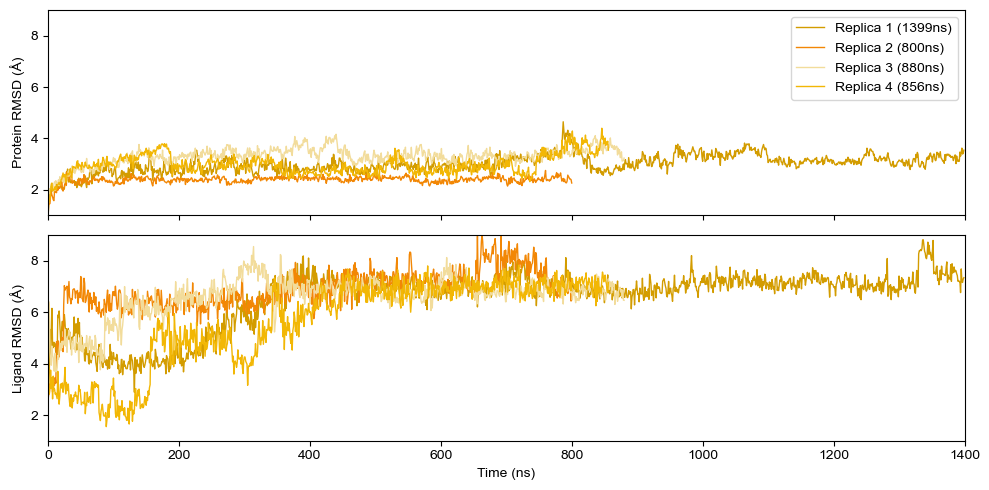

In [4]:
sim = sim_list[0]
with mpl.rc_context(figure_rc_params):
    f,ax = plt.subplots(nrows=2, ncols=1, figsize=(10,5), sharex=True)
    ax= np.ravel(ax)

    ### first, call RMSD
    for n,u_rep in enumerate(all_unis[sim.name]):
        rmsd = analysis_functions.calc_rmsd(
                u=u_rep,
                ref_name=sim.ref_path,
                select="backbone",
                groupselections=[f'resname {sim.ligname}']
        )
    
        ax = plot_lig_prot_rmsd_all_reps(ax,
                                        sim=sim,
                                        rmsd=rmsd,
                                        color=color_l[n],
                                        label=f'Replica {n+1} ({all_lens[sim.name][n]-1}ns)')
    ax[0].set_xlim(0,1400)
    ax[1].set_ylim(1,9)
    ax[0].set_ylim(1,9)

    plt.tight_layout()
    #plt.savefig(f'../../../images_paper/simulations/replica_RMSD.{sim.name}.svg')
    plt.show()

# comparative plotting

In [7]:
sim_list = [sims.PfHT_MMV12, sims.PfHT_MMV_crystal]
all_unis, all_lens = analysis_functions.load_unis(
    sim_list= sim_list
)

Can compare means/ stds here

PfHT_MMV12 0
PfHT_MMV12 1
PfHT_MMV12 2
PfHT_MMV_crystal 0
PfHT_MMV_crystal 1
PfHT_MMV_crystal 2
PfHT_MMV_crystal 3


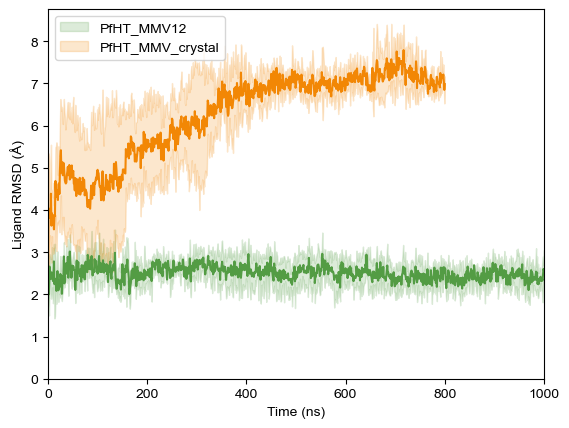

In [13]:
with mpl.rc_context(figure_rc_params):

    mean_cutoff = 1400
    for sim in sim_list:
        lig_rmsds = np.zeros((sim.n_replicas,1400))
        for n,u_rep in enumerate(all_unis[sim.name]):
            rmsd = analysis_functions.calc_rmsd(
                u=u_rep,
                ref_name=sim.ref_path,
                select="backbone",
                groupselections=[f'resname {sim.ligname}']
            )
            print(sim.name,n)
            lig_rmsds[n,:all_lens[sim.name][n]] = rmsd[:,3] ##3 is lig
        #plot until shortest replica len    
        lig_rmsds = lig_rmsds[:,:min(all_lens[sim.name])]
        plt.plot(np.mean(lig_rmsds,axis=0),
                color=sim.color)
        plt.fill_between(range(0,np.shape(lig_rmsds)[1]),
                        np.mean(lig_rmsds,axis=0)-np.std(lig_rmsds,axis=0),
                        np.mean(lig_rmsds,axis=0)+np.std(lig_rmsds,axis=0),
                        alpha=0.2,
                        color=sim.color,
                        label=sim.name)

    plt.legend()
    plt.xlim(0,1000)
    plt.xlabel("Time (ns)")
    plt.ylabel('Ligand RMSD (Å)')
    plt.ylim(0)
    plt.savefig('../../../images_paper/simulations/avg_RMSD.PfHT_MMV12_vs_GLUT1_MMV12.svg')
    #plt.savefig('../../../images_paper/simulations/avg_RMSD.PfHT_3361_em_crystal.svg')

    plt.show()


Or plot individual lines if that's more your style

/data/PfHT_MMV/C3361_sims/crystal_str_6m2l/replica_1/production/PfHT_3361.crystal.1.0_200ns.protonly.tpr
[[0.00000000e+00 0.00000000e+00 6.98103349e-07 0.00000000e+00]
 [1.00000000e+00 1.00000000e+03 1.56813607e+00 4.76389005e-01]
 [2.00000000e+00 2.00000000e+03 1.81900138e+00 5.61245314e-01]
 ...
 [3.56000000e+02 3.56000000e+05 3.57520935e+00 1.06407064e+00]
 [3.57000000e+02 3.57000000e+05 3.57919861e+00 1.67486385e+00]
 [3.58000000e+02 3.58000000e+05 3.57664406e+00 1.24357939e+00]]
/data/PfHT_MMV/C3361_sims/crystal_str_6m2l/replica_2/production/PfHT_3361.crystal.2.0_200ns.protonly.tpr
[[0.00000000e+00 0.00000000e+00 1.30603178e-06 0.00000000e+00]
 [1.00000000e+00 1.00000000e+03 1.18374615e+00 6.44088971e-01]
 [2.00000000e+00 2.00000000e+03 1.20635319e+00 7.73497349e-01]
 ...
 [4.67000000e+02 4.67000000e+05 4.44638130e+00 4.30058319e+00]
 [4.68000000e+02 4.68000000e+05 3.99541720e+00 3.76312840e+00]
 [4.69000000e+02 4.69000000e+05 4.27212965e+00 3.69532805e+00]]
/data/PfHT_MMV/C3361_s

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[0.00000000e+00 0.00000000e+00 1.10379831e-06 0.00000000e+00]
 [1.00000000e+00 1.00000000e+03 1.35662065e+00 9.77248839e-01]
 [2.00000000e+00 2.00000000e+03 1.54124630e+00 1.46074599e+00]
 ...
 [5.09000000e+02 5.09000000e+05 3.17944197e+00 3.92212825e+00]
 [5.10000000e+02 5.10000000e+05 3.28505947e+00 3.71892578e+00]
 [5.11000000e+02 5.11000000e+05 3.29659173e+00 3.83133929e+00]]


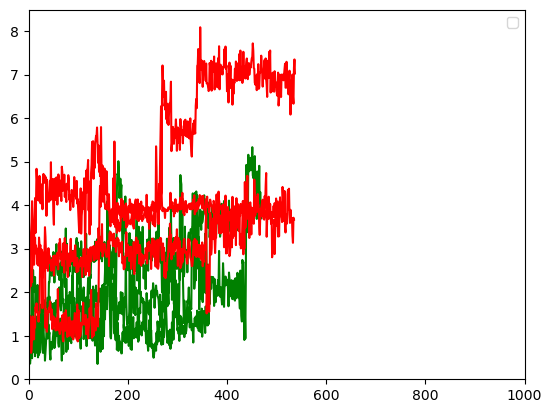

In [34]:
from MDAnalysis.analysis.rms import RMSD

for sim in sim_list:
    for n,u_rep in enumerate(all_unis[sim.name]):
        print(u_rep.filename)
        r = RMSD(
            u_rep,
            ref=sim.ref_path,
            select="backbone",
            groupselections=['resname F00 and (smarts [C@@H] or smarts [O])']
        )
        r.run()
        rmsd = np.array(r.results['rmsd'])
        print(rmsd)
        plt.plot(rmsd[:,3], color=sim.color)

plt.legend()
plt.xlim(0,1000)
plt.ylim(0)
plt.show()

In [28]:
r = RMSD(u_rep, ref=sim.ref_path, select='backbone', groupselections=['resname F00 and (smarts [C@@H])'])

r.run()

In [ ]:
u_rep.select_atoms('resname F00 and (smarts [C@@H] or smarts [O])').atoms.names

array(['O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'C12', 'C13', 'C14', 'C15',
       'C16'], dtype=object)

In [29]:
r.results

{'rmsd': array([[0.00000000e+00, 0.00000000e+00, 6.98103349e-07, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+03, 1.56813607e+00, 3.47482869e-01],
       [2.00000000e+00, 2.00000000e+03, 1.81900138e+00, 5.20543089e-01],
       ...,
       [3.56000000e+02, 3.56000000e+05, 3.57520935e+00, 9.85566917e-01],
       [3.57000000e+02, 3.57000000e+05, 3.57919861e+00, 1.26872098e+00],
       [3.58000000e+02, 3.58000000e+05, 3.57664406e+00, 1.04044423e+00]])}

In [21]:
u_rep.select_atoms('resname F00')

<AtomGroup with 55 atoms>